In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

!pip install geopy

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [44]:
#TODO FILL NAS
df_host = pd.read_csv('host_data.csv')
df_loc = pd.read_csv('location_data.csv')
df_pric = pd.read_csv('pricing_data.csv')
df_prop = pd.read_csv('property_data.csv')
df_rev = pd.read_csv('review_data.csv')

In [45]:
dfs = [df_host, df_loc, df_pric, df_prop, df_rev]
for i in dfs:
    print(i.isna().sum())

customer_id                   0
host_since                  173
host_response_rate        17193
host_has_profile_pic        173
host_identity_verified      173
dtype: int64
customer_id         0
neighbourhood    9550
latitude            0
longitude           0
city                0
zipcode           894
dtype: int64
customer_id            0
log_price              0
cleaning_fee           0
cancellation_policy    0
dtype: int64
customer_id        0
property_type      0
room_type          0
bedrooms          83
bathrooms        182
accommodates       0
beds             113
dtype: int64
customer_id                 0
number_of_reviews           0
review_scores_rating    15733
first_review            14932
last_review             14896
dtype: int64


In [51]:
dfs = [df_host, df_loc, df_pric, df_prop, df_rev]
for i in dfs:
    print(i.shape)
    print(i.head(1))

(69546, 5)
                                         customer_id  host_since  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  10/07/2013   

  host_response_rate host_has_profile_pic host_identity_verified  
0               100%                    t                      t  
(69546, 6)
                                         customer_id     neighbourhood  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  Columbia Heights   

    latitude  longitude city zipcode  
0  38.921768 -77.030985   DC   20009  
(69546, 4)
                                         customer_id  log_price  cleaning_fee  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        4.0         False   

  cancellation_policy  
0            moderate  
(69546, 7)
                                         customer_id property_type  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        house    

        room_type  bedrooms  bathrooms  accommodates  beds  
0   private room        1.0        1.0       

In [53]:
for i, df in enumerate(dfs, start=1):
    num_duplicates = df.duplicated(subset=['customer_id'], keep=False).sum()
    print(f"DataFrame {i}: {num_duplicates} duplicate rows based on 'customer_id'")

DataFrame 1: 2728 duplicate rows based on 'customer_id'
DataFrame 2: 2728 duplicate rows based on 'customer_id'
DataFrame 3: 2728 duplicate rows based on 'customer_id'
DataFrame 4: 2728 duplicate rows based on 'customer_id'
DataFrame 5: 2728 duplicate rows based on 'customer_id'


In [55]:
for i, df in enumerate(dfs, start=1):
    num_duplicates = df.duplicated(keep=False).sum()
    print(f"DataFrame {i}: {num_duplicates} fully identical rows")

DataFrame 1: 2728 fully identical rows
DataFrame 2: 2728 fully identical rows
DataFrame 3: 2728 fully identical rows
DataFrame 4: 2728 fully identical rows
DataFrame 5: 2728 fully identical rows


In [57]:
df_host = df_host.drop_duplicates(keep='first')
df_loc = df_loc.drop_duplicates(keep='first')
df_pric = df_pric.drop_duplicates(keep='first')
df_prop = df_prop.drop_duplicates(keep='first')
df_rev = df_rev.drop_duplicates(keep='first')
dfs = [df_host, df_loc, df_pric, df_prop, df_rev]

In [59]:
for i in dfs:
    print(i.shape)
    print(i.head(1))

(68182, 5)
                                         customer_id  host_since  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  10/07/2013   

  host_response_rate host_has_profile_pic host_identity_verified  
0               100%                    t                      t  
(68182, 6)
                                         customer_id     neighbourhood  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  Columbia Heights   

    latitude  longitude city zipcode  
0  38.921768 -77.030985   DC   20009  
(68182, 4)
                                         customer_id  log_price  cleaning_fee  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        4.0         False   

  cancellation_policy  
0            moderate  
(68182, 7)
                                         customer_id property_type  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        house    

        room_type  bedrooms  bathrooms  accommodates  beds  
0   private room        1.0        1.0       

In [61]:
df = df_host.merge(df_loc, on='customer_id', how='inner') \
                   .merge(df_pric, on='customer_id', how='inner') \
                   .merge(df_rev, on='customer_id', how='inner') \
                   .merge(df_prop, on='customer_id', how='inner')
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [63]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(50)

In [65]:
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)

df.loc[:, 'host_response_rate'] = df['host_response_rate'].astype(str).str.rstrip('%')
df.loc[:, 'host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
df['host_response_rate'].isna().sum()

df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'] = (pd.to_datetime(datetime.now()) - df['host_since']).dt.days / 365
df['host_since'] = df['host_since'].fillna(df['host_since'].median())

C:\Users\Arche\AppData\Local\Temp\ipykernel_19528\3929864502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
C:\Users\Arche\AppData\Local\Temp\ipykernel_19528\3929864502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [67]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode())
df['beds'] = df['beds'].fillna(df['beds'].mode())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode())

df['bedrooms'] = df['bedrooms'].replace(-1, 1)

In [69]:
df.isna().sum()

customer_id                   0
host_since                    0
host_response_rate            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood              9368
latitude                      0
longitude                     0
city                          0
zipcode                     876
log_price                     0
cleaning_fee                  0
cancellation_policy           0
number_of_reviews             0
review_scores_rating          0
first_review              14619
last_review               14583
property_type                 0
room_type                     0
bedrooms                     80
bathrooms                   177
accommodates                  0
beds                        112
dtype: int64

In [71]:
#df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.rstrip('%'))
#Change host_since to a numeric value ( we calculate the duration)
#df['host_since'] = ((pd.to_datetime(datetime.now()) - df['host_since']).dt.days) / 365
#Change t/f to True and False
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False}).astype(bool)
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype(bool)
#Capatalize values in room_type and property_type to have a uniform standard between values
df['room_type'] = df['room_type'].str.upper()
df['property_type'] = df['property_type'].str.upper()

In [73]:
filled_loc_data = 'loc_data_filled.csv'
geolocator = Nominatim(user_agent="lazaniaa7@gmail.com")
        
def get_zipcode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        if location and 'postcode' in location.raw['address']:
            return location.raw['address']['postcode']
    except GeocoderTimedOut:
        return None
    return None


if os.path.exists(filled_loc_data):
    df = pd.read_csv(filled_loc_data)
else:
    for idx, row in df[df['zipcode'].isna()].iterrows():
        if pd.notna(row['latitude']) and pd.notna(row['longitude']):
            zipcode = get_zipcode(row['latitude'], row['longitude'])
            df.at[idx, 'zipcode'] = zipcode

KeyboardInterrupt: 

In [ ]:
for i in df['zipcode'][df['neighbourhood'].isna()]:
        try:
            df.loc[(df_loc['zipcode'] == i) & (df['neighbourhood'].isna()), 'neighbourhood'] = df['neighbourhood'][df['zipcode'] == i].mode()[0]
        except:
            #NNF = NO NEIGHBOURHOOD FOUND
            df.loc[(df_loc['zipcode'] == i) & (df['neighbourhood'].isna()), 'neighbourhood'] = 'NNF'


df.to_csv(filled_loc_data)

In [ ]:
print(df.shape)
print(df.duplicated().sum())

In [ ]:
df.isna().sum()

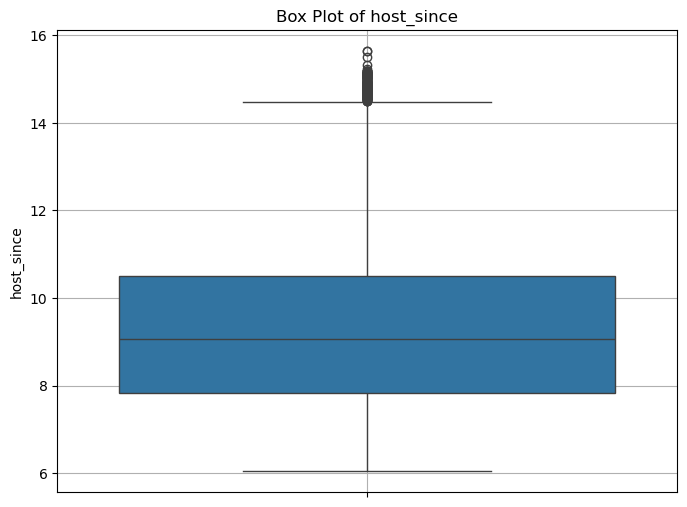

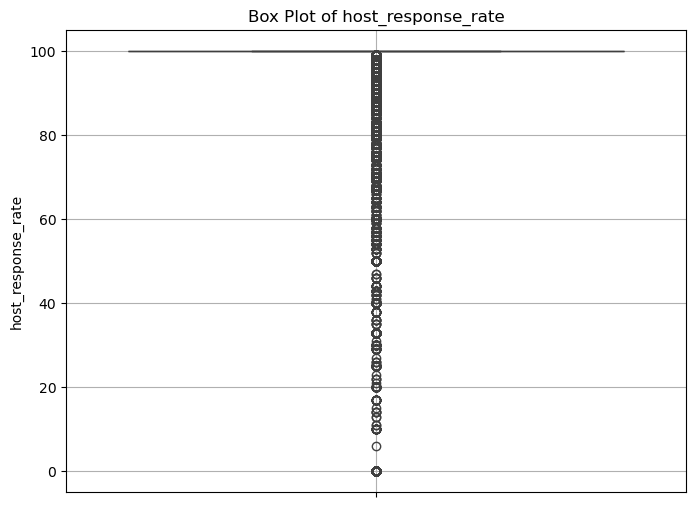

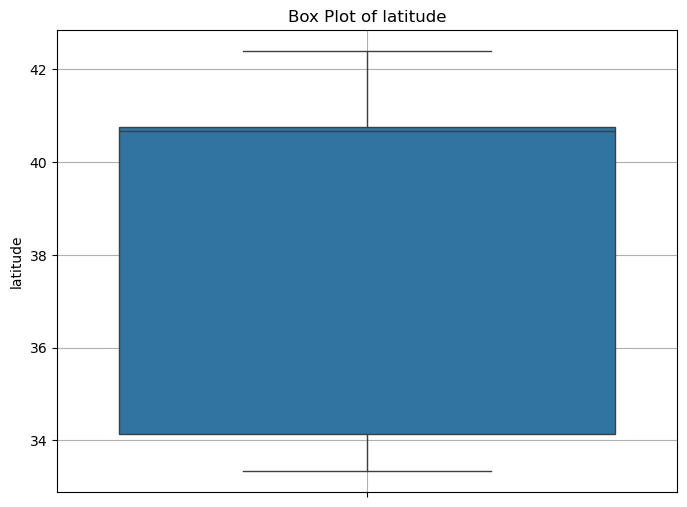

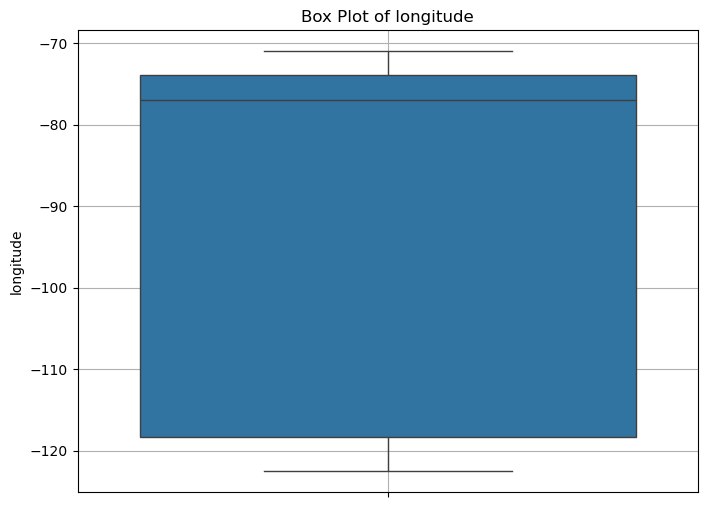

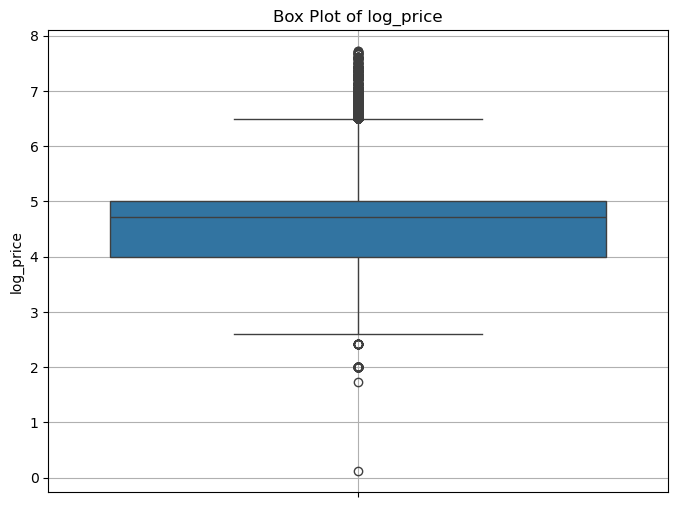

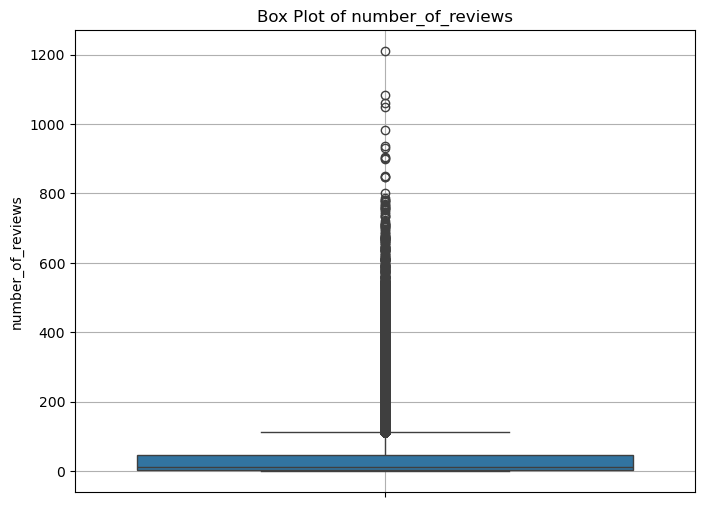

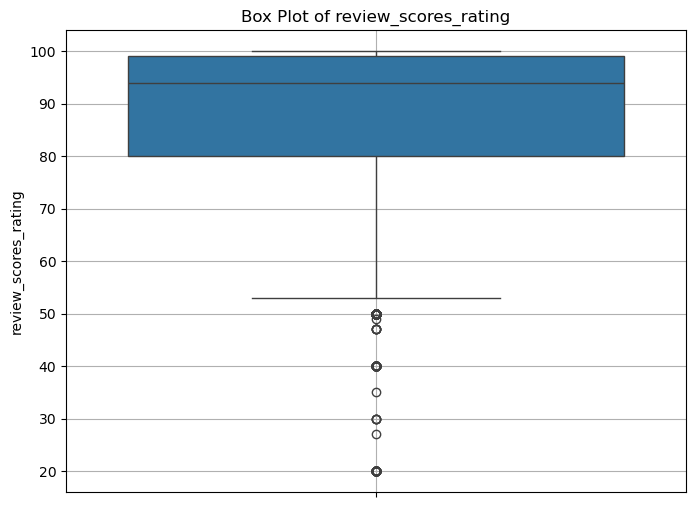

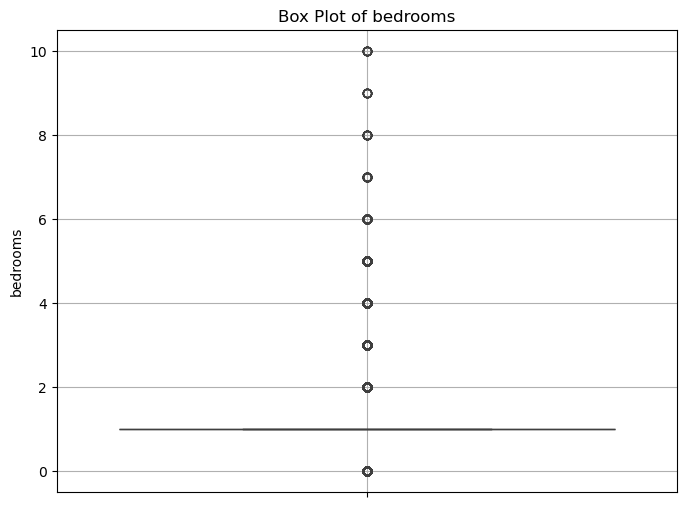

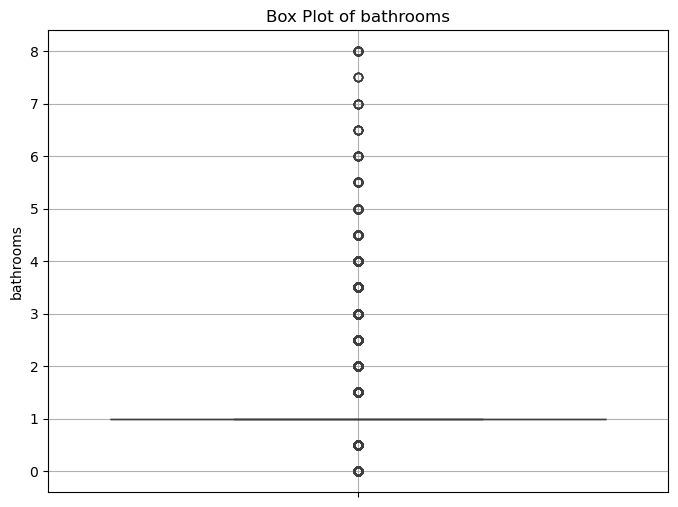

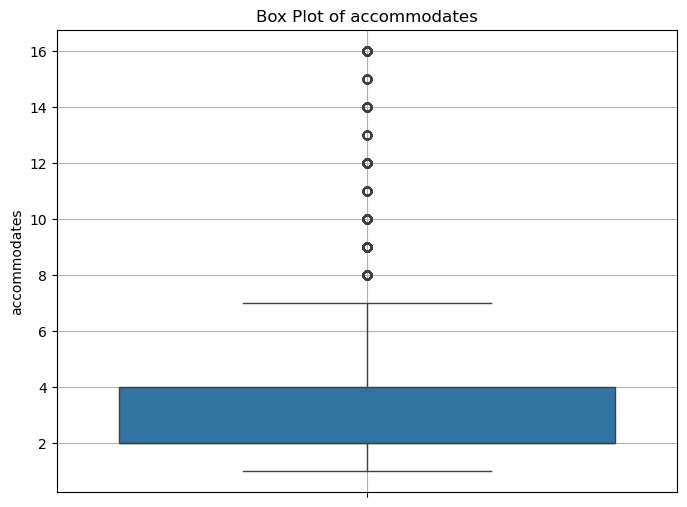

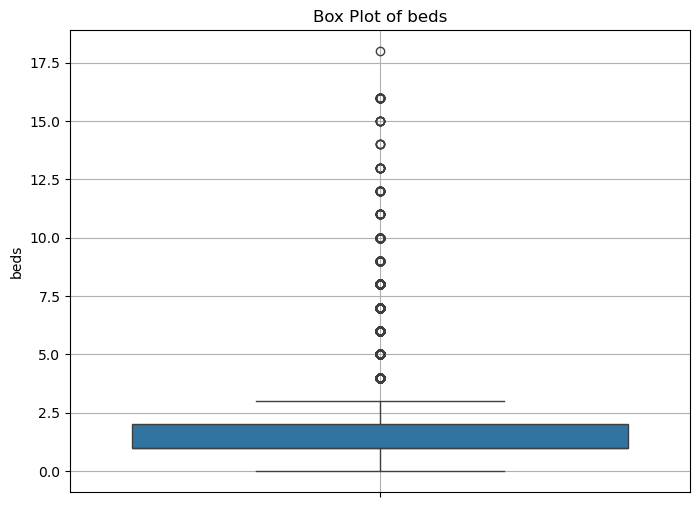

In [78]:
numerical_cols = df.select_dtypes(include=['number']).columns


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col) 
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [88]:
# Step 1: Display data types of all columns
print("Data types of all columns:")
print(df.dtypes)

# Convert 'host_since' to datetime
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
print(df['host_since'].head())

# Define categorical columns
categorical_columns = ['neighbourhood', 'city', 'zipcode', 'cancellation_policy', 'property_type', 'room_type']

# Create dummy variables
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the results
print("Columns after dummy encoding:")
print(df_dummies.columns)


Data types of all columns:
customer_id                       object
host_since                datetime64[ns]
host_response_rate               float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood                     object
latitude                         float64
longitude                        float64
city                              object
zipcode                           object
log_price                        float64
cleaning_fee                        bool
cancellation_policy               object
number_of_reviews                  int64
review_scores_rating             float64
first_review              datetime64[ns]
last_review               datetime64[ns]
property_type                     object
room_type                         object
bedrooms                         float64
bathrooms                        float64
accommodates                       int64
beds                             float64
dtype: object
0   1970-01-01 0